In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from qiboconnection.api import API

from qililab import build_platform

PATH = os.getcwd()
os.environ["DATA"] = f"{PATH}/data"
os.environ["RUNCARDS"] = f"{PATH}/runcards"

In [2]:
"""Load the platform 'sauron' from the runcard."""
platform = build_platform(name="sauron_vna")

[qililab] [0.16.1|INFO|2023-04-06 11:10:24]: Building platform
INFO:qililab.config.config:Building platform


In [3]:
platform.connect()

[qililab] [0.16.1|INFO|2023-04-06 11:10:25]: Connecting to instrument keysight_e5080b_controller.
INFO:qililab.config.config:Connecting to instrument keysight_e5080b_controller.
[qililab] [0.16.1|INFO|2023-04-06 11:10:25]: Reset instrument VNA.
INFO:qililab.config.config:Reset instrument VNA.
[qililab] [0.16.1|INFO|2023-04-06 11:10:25]: Connected to the instruments
INFO:qililab.config.config:Connected to the instruments


In [4]:
vna_e5080b = platform.instruments.elements[0]

In [5]:
type(vna_e5080b)

qililab.instruments.keysight.e5080b_vna.E5080B

In [6]:
vna_e5080b.read()

'+1\n'

Get & set parameters

In [7]:
vna_e5080b.power = -20
vna_e5080b.power

-20

In [6]:
vna_e5080b.scattering_parameter = "S21"
vna_e5080b.scattering_parameter

<VNAScatteringParameters.S21: 'S21'>

In [9]:
vna_e5080b.if_bandwidth = 200
vna_e5080b.if_bandwidth

200

In [10]:
vna_e5080b.averaging_enabled = False
vna_e5080b.averaging_enabled

False

In [11]:
vna_e5080b.number_averages = 1
vna_e5080b.number_averages

1

In [24]:
vna_e5080b.number_points = 200
vna_e5080b.number_points

200

In [12]:
vna_e5080b.sweep_mode = "group"
vna_e5080b.sweep_mode

<VNASweepModes.GRO: 'group'>

In [ ]:
vna_e5080b.electrical_delay = 100e-9 # Electrical delay in ns
vna_e5080b.electrical_delay

In [ ]:
vna_e5080b.device_timeout = 10 * 1000 # This is a 10 seconds timeout, timeout in (ms)
vna_e5080b.device_timeout

In [ ]:
# Same for the following parameters:
# vna_e5080b.frequency_span
# vna_e5080b.frequency_center
# vna_e5080b.frequency_start
# vna_e5080b.frequency_stop

# The following parameters are read-only:
# vna_e5080b.trigger_mode

In [14]:
vna_e5080b.ready()

True

In [ ]:
vna_e5080b.release()

In [ ]:
vna_e5080b.get_frequencies()

In [ ]:
vna_e5080b.average_clear()

In [ ]:
vna_e5080b.autoscale()

In [ ]:
npoints = 200
jj = 9
f0s = [6.061445e9,
       6.152293e9,
       6.23766e9,
       6.31578e9,
       6.403124e9,
       6.485132e9,
       6.580649e9,
       6.653112e9,
       6.732787e9,
       6.828278e9,
      ]
fspan = [2e6, 2e6, 2e6, 2e6, 2e6, 2e6, 2e6, 2e6, 2e6, 2e6]
vna_e5080b.frequency_center = 8e9
vna_e5080b.frequency_span = 2e9
freq = np.linspace(-0.5, 0.5, npoints) * fspan[jj] + f0s[jj]

In [25]:
results = vna_e5080b.read_tracedata()

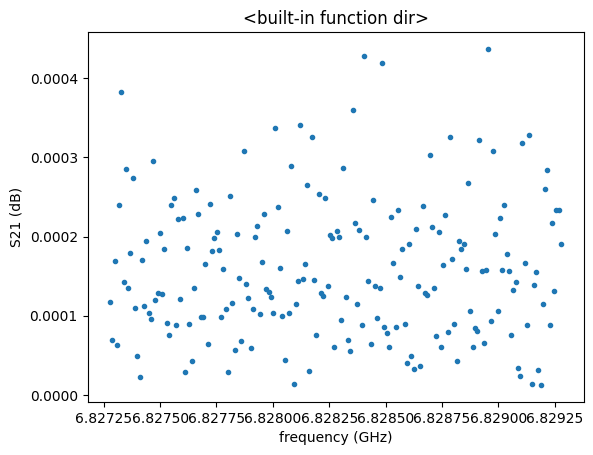

In [26]:
### Single trace ###
# vna.release() #That's how get_trace should be used. It maintains the data.

# dir = save_data(f'single_trace_res{jj}',np.real(results), np.imag(results), freq, [])
# print(dir)

plt.plot(freq * 1e-9, np.abs(results), ".")
plt.title(dir)
plt.xlabel("frequency (GHz)")
plt.ylabel("S21 (dB)")
plt.show()

In [31]:
platform.close()

[qililab] [0.9.0|INFO|2022-10-22 10:33:49]: Closing instrument keysight_e5080b_controller.
INFO:qililab.config.config:Closing instrument keysight_e5080b_controller.
